In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

import warnings

plt.rcParams['figure.figsize'] = (10,6)

warnings.filterwarnings('ignore')
sns.set()

**Mean** **Squared** **Error** (MSE)


In [ ]:
x = np.expand_dims(np.linspace(5,16, 10), axis=1)
y = np.expand_dims(np.array([1.5, 2.6, 3., 4.5, 5.1, 5.3, 5.4, 5.6, 5.6, 5.9]), axis=1)

print('x:', x)
print('y:', y)

x: [[ 5.        ]
 [ 6.22222222]
 [ 7.44444444]
 [ 8.66666667]
 [ 9.88888889]
 [11.11111111]
 [12.33333333]
 [13.55555556]
 [14.77777778]
 [16.        ]]
y: [[1.5]
 [2.6]
 [3. ]
 [4.5]
 [5.1]
 [5.3]
 [5.4]
 [5.6]
 [5.6]
 [5.9]]


In [ ]:
poly = PolynomialFeatures(degree=2)
x_trans = poly.fit_transform(x)

lr = linear_model.LinearRegression()
lr.fit(x_trans, y)
print(lr.coef_)
print(lr.intercept_)

[[ 0.          1.39640308 -0.04843163]]
[-4.2757701]


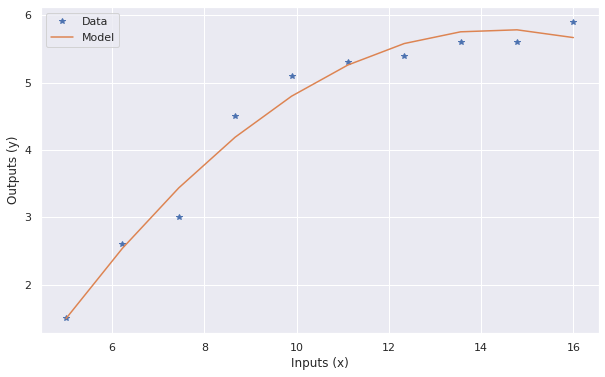

In [ ]:
plt.plot(x, y, '*', label='Data')
plt.plot(x, lr.predict(x_trans), label='Model')

plt.legend()
plt.xlabel('Inputs (x)')
plt.ylabel('Outputs (y)')

plt.show()

In [ ]:
a, b, c = -0.04843163, 1.39640308, -4.2757701 

y_hat = a * x**2 + b * x + c

print(np.sum((y_hat - y) ** 2) / 10)

52.88937559209246


# Section 2 cross entropy


In [ ]:
x = np.array([[0.77330069, 0.41045362, 0.11336399],
 [0.33767255, 0.84421107, 0.41008781],
 [0.96718145, 0.0899926,  0.07174224],
 [0.02052135, 0.77886221, 0.70268842],
 [0.64919759, 0.30145436, 0.04102113],
 [0.68973698, 0.58821819, 0.10546255],
 [0.29698513, 0.43547422, 0.28529975],
 [0.2968849,  0.61283841, 0.63136324],
 [0.32357182, 0.13638021, 0.90788238],
 [0.89679202, 0.97985175, 0.11401821]])
y = np.array([[0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0]])
y_hat = np.array([[0.57999228],
 [0.15335178],
 [0.36948967],
 [0.89590253],
 [0.24150758],
 [0.1124793 ],
 [0.85542546],
 [0.80923389],
 [0.54269061],
 [0.78269714]])

In [ ]:
data = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'x3': x[:, 2], 'y': y[:,0]})
data

,x1,x2,x3,y
0,0.773301,0.410454,0.113364,0
1,0.337673,0.844211,0.410088,0
2,0.967181,0.089993,0.071742,0
3,0.020521,0.778862,0.702688,1
4,0.649198,0.301454,0.041021,1
5,0.689737,0.588218,0.105463,1
6,0.296985,0.435474,0.285300,0
7,0.296885,0.612838,0.631363,1
8,0.323572,0.136380,0.907882,1
9,0.896792,0.979852,0.114018,0


In [ ]:
ce = -1 * (y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
cross_entropy = np.sum(ce) / 10
print(cross_entropy)


print(sklearn.metrics.log_loss(y, y_hat))

0.9494248552075849
0.9494248552075849


# Section 3

In [ ]:
x, y = make_regression(n_samples=10, noise=1.0, n_features=1, n_targets=1, random_state=42)

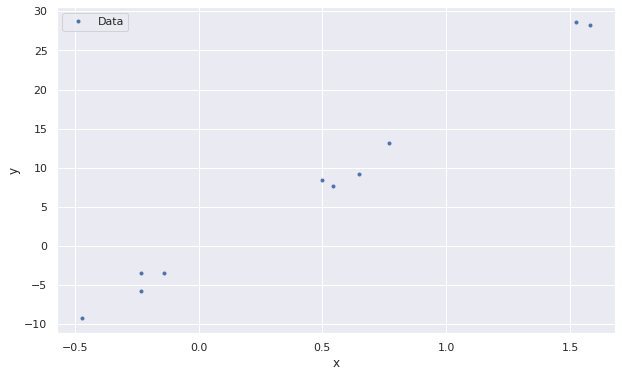

In [ ]:
plt.plot(x, y, 'b.', label='Data')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
print('x:', '\n', x)
print('y:', '\n', np.expand_dims(y, axis=1))

x: 
 [[-0.1382643 ]
 [-0.46947439]
 [ 0.76743473]
 [-0.23413696]
 [-0.23415337]
 [ 0.54256004]
 [ 0.49671415]
 [ 1.52302986]
 [ 1.57921282]
 [ 0.64768854]]
y: 
 [[-3.43807304]
 [-9.23956028]
 [13.21147261]
 [-5.78107045]
 [-3.44104789]
 [ 7.72547556]
 [ 8.46012329]
 [28.64285505]
 [28.28598578]
 [ 9.16404571]]


$Model:~ \\
\hat{y} = mx + c
$

In [ ]:
#@title Default title text
poly = PolynomialFeatures(degree=1)
x_trans = poly.fit_transform(x)

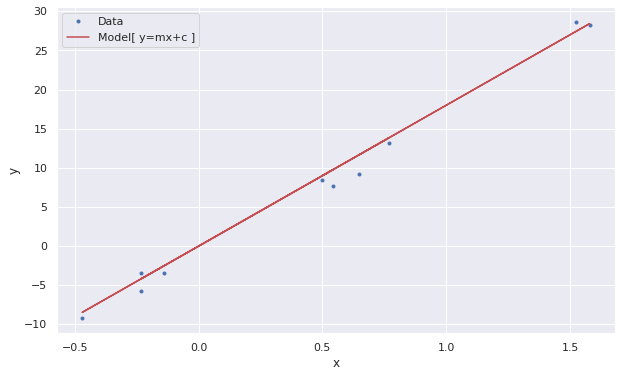

Mean Squared Error: 1.7084731968779536
MSE: 1.7084731968779536


In [ ]:
#@title Search Problem { run: "auto", vertical-output: true, output-height: 20, form-width: "250px" }
m = 18 #@param {type:"slider", min:-200, max:200, step:1}
c = -9 #@param {type:"slider", min:-200, max:200, step:1}

y_hat = np.sum(m * x_trans + c, axis=1)

plt.plot(x, y, 'b.', label='Data')
plt.plot(x, y_hat, 'r-', label='Model[ y=mx+c ]')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Mean Squared Error: {}'.format(mean_squared_error(y, y_hat)))
print('MSE: {}'.format(np.sum((y-y_hat)**2) / len(y)))